In [40]:
from IPython.display import display
import pandas as pd
import numpy as np #mathematical calculation
import seaborn as sns #data visualization
import matplotlib.pyplot as plt #graph plotting
import missingno as msno
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy import stats
from statsmodels.stats import weightstats as stests
import warnings
warnings.filterwarnings('ignore')

In [41]:
loan_data_test = pd.read_csv('test.csv')
loan_data_train = pd.read_csv('train.csv')

In [42]:
#Storing original data
loan_data_test_original = loan_data_test.copy()
loan_data_train_original = loan_data_train.copy()

In [43]:
#Structure

In [44]:
loan_data_train.columns
#12 independent variable
#1 target variable -> Loan_Status

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [45]:
loan_data_train.dtypes
# object: Categorical variables
# int64: Integer variables, Cardinal features
# float64: Number with decimal values, numerical features

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [46]:
loan_data_train.shape
# train dataset
# 614 rows
# 13 columns

(614, 13)

In [47]:
loan_data_test.shape
#test dataset
# 367 rows
# 12 columns

(367, 12)

In [48]:
loan_data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [49]:
loan_data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


Y    422
N    192
Name: Loan_Status, dtype: int64

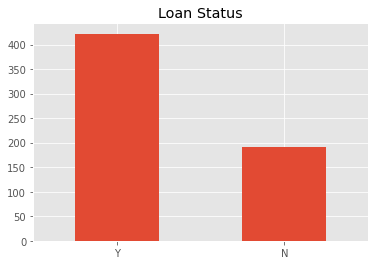

In [50]:
#How many approved loans
plt.style.use('ggplot')
loan_data_train['Loan_Status'].value_counts().plot.bar(title='Loan Status', rot=0)
display(loan_data_train['Loan_Status'].value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64

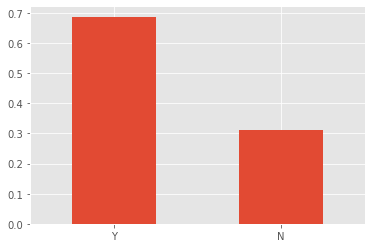

In [51]:
plt.style.use('ggplot')
loan_data_train['Loan_Status'].value_counts(normalize=True).plot.bar('Loan Status Normalized', rot=0)
#normalize=True shows proportion instead number value
display(loan_data_train['Loan_Status'].value_counts())

In [52]:
#Cardinal Features

Male      489
Female    112
Name: Gender, dtype: int64

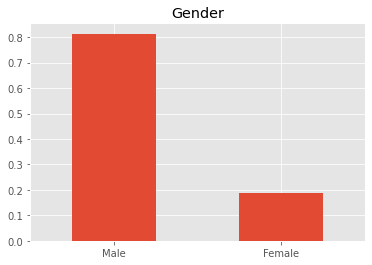

In [53]:
#Sex distribution on loan requests
plt.style.use('ggplot')
loan_data_train['Gender'].value_counts(normalize=True).plot.bar(title='Gender', rot=0)
display(loan_data_train['Gender'].value_counts())

Yes    398
No     213
Name: Married, dtype: int64

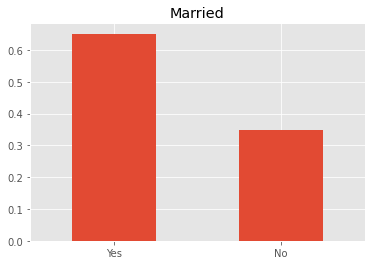

In [54]:
#Marrital Status of loan requests
plt.style.use('ggplot')
loan_data_train['Married'].value_counts(normalize=True).plot.bar(title='Married', rot=0)
display(loan_data_train['Married'].value_counts())

No     500
Yes     82
Name: Self_Employed, dtype: int64

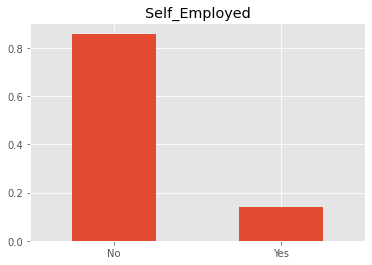

In [55]:
#Employment Type of loan requests
plt.style.use('ggplot')
loan_data_train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed', rot=0)
display(loan_data_train['Self_Employed'].value_counts())

1.0    475
0.0     89
Name: Credit_History, dtype: int64

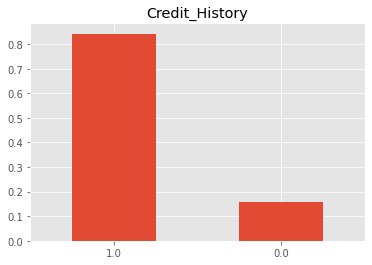

In [56]:
#1 if the loan applicants have repaid their debts
plt.style.use('ggplot')
loan_data_train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History', rot=0)
display(loan_data_train['Credit_History'].value_counts())

In [57]:
#Ordinal Features

<AxesSubplot:title={'center':'Property_Area'}>

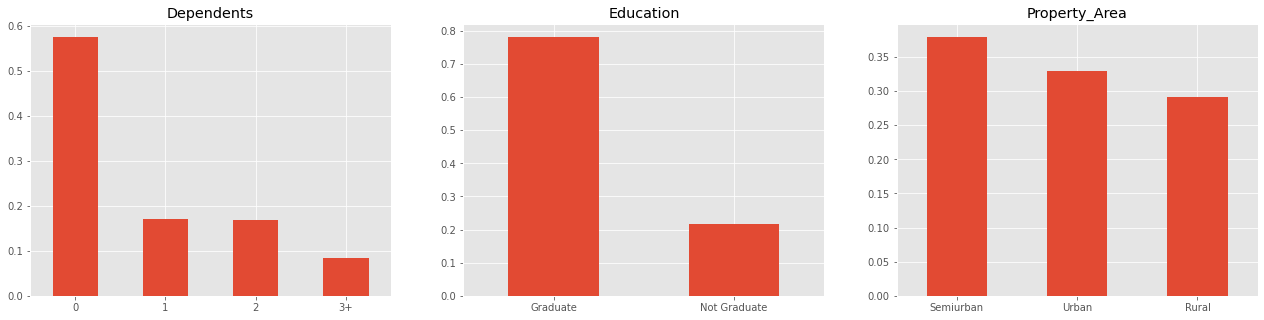

In [58]:
fig2, ax2 = plt.subplots(1, 3)

loan_data_train['Dependents'].value_counts(normalize=True).plot(figsize=(22,5), ax=ax2[0], kind='bar', title='Dependents', rot=0)
loan_data_train['Education'].value_counts(normalize=True).plot(ax=ax2[1], kind='bar', title='Education', rot=0)
loan_data_train['Property_Area'].value_counts(normalize=True).plot(ax=ax2[2], kind='bar', title='Property_Area', rot=0)

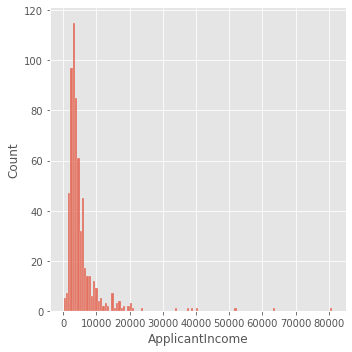

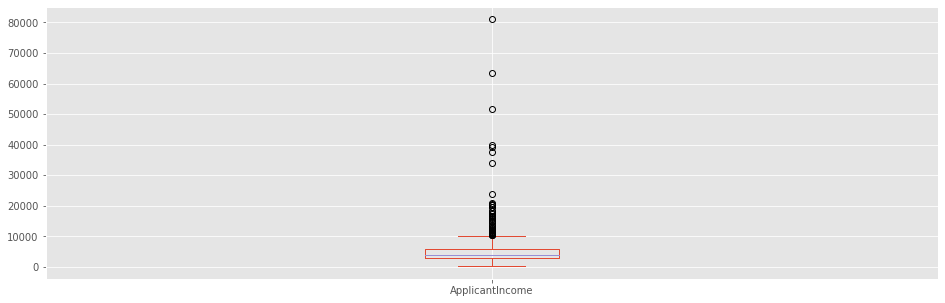

In [59]:
#Numerical variables
#Applicant Income Distribution
sns.displot(loan_data_train['ApplicantIncome'])
plt.show()
loan_data_train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

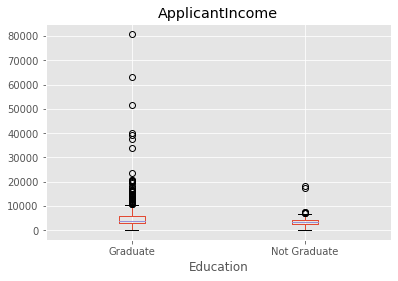

In [60]:
#Applicant Income Distribution by Education Level
loan_data_train.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle("")

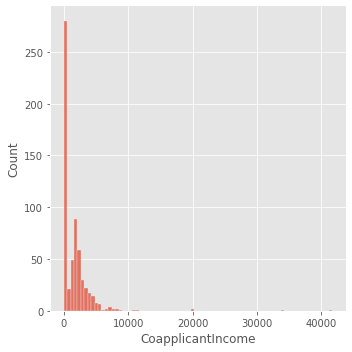

<AxesSubplot:>

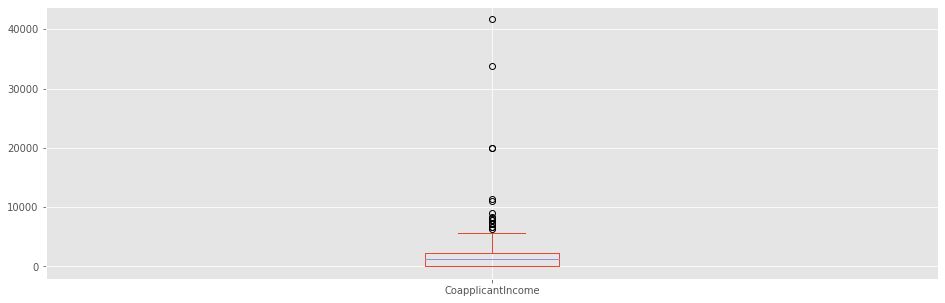

In [61]:
#Coapplicant Income Distribution by Education Level
sns.displot(loan_data_train['CoapplicantIncome'])
plt.show()
loan_data_train['CoapplicantIncome'].plot.box(figsize=(16,5))

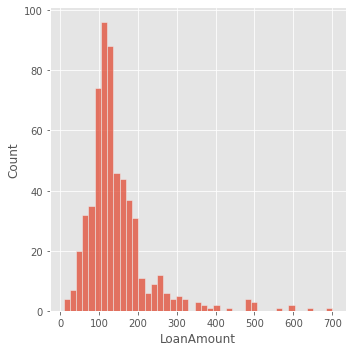

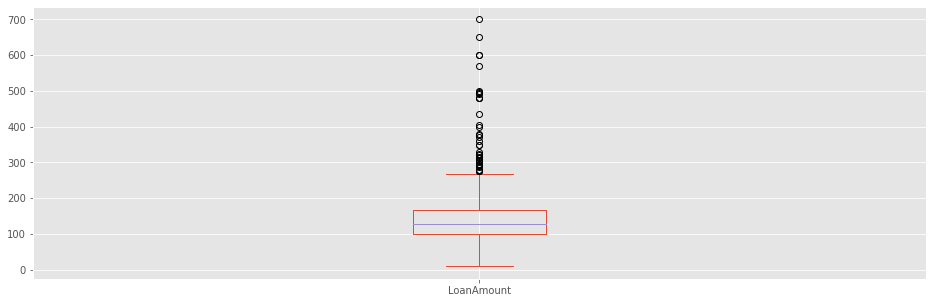

In [62]:
#Loan Amount Distribution of Applications
loan_data_train.notna()
sns.displot(loan_data_train['LoanAmount'])
plt.show()
loan_data_train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

In [63]:
#Relations between independent variables and target variable

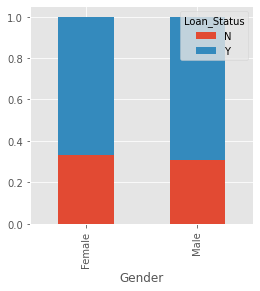

In [64]:
#Gender with Loan Status
gender = pd.crosstab(loan_data_train['Gender'], loan_data_train['Loan_Status'])
gender.div(gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

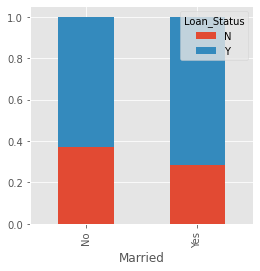

In [65]:
#Marital Status with Loan Status
married = pd.crosstab(loan_data_train['Married'], loan_data_train['Loan_Status'])
married.div(married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

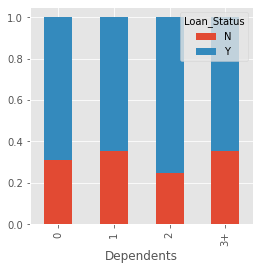

In [66]:
#Number of Dependents with Loan Status
dependents = pd.crosstab(loan_data_train['Dependents'], loan_data_train['Loan_Status'])
dependents.div(dependents.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

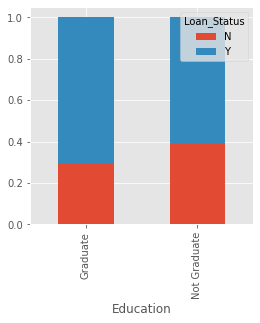

In [67]:
#Education Level with Loan Status
education = pd.crosstab(loan_data_train['Education'], loan_data_train['Loan_Status'])
education.div(education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

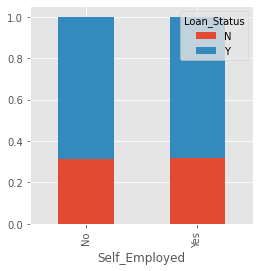

In [68]:
#Employment Type with Loan Status
employment_type = pd.crosstab(loan_data_train['Self_Employed'], loan_data_train['Loan_Status'])
employment_type.div(employment_type.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

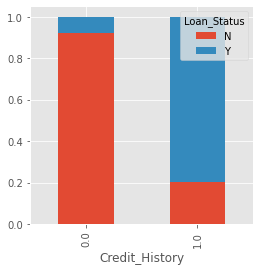

In [69]:
#Credit History(Applicant paid previous debits?) with Loan Status
credit_history = pd.crosstab(loan_data_train['Credit_History'], loan_data_train['Loan_Status'])
credit_history.div(credit_history.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

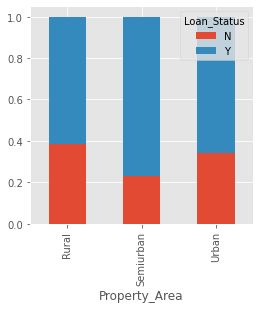

In [70]:
#Property Location Area with Loan Status
property_area = pd.crosstab(loan_data_train['Property_Area'], loan_data_train['Loan_Status'])
property_area.div(property_area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

In [71]:
#Numerical Independent Variable vs Target Variable

<AxesSubplot:xlabel='Loan_Status'>

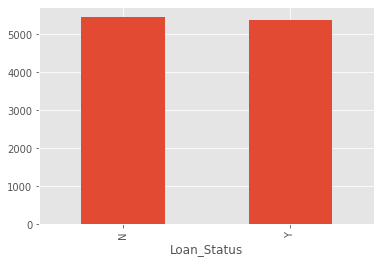

In [72]:
#Mean Income for Approved and Unapproved loans
loan_data_train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
#Both Approved and Unnaproved loan requests have the same mean income

Text(0, 0.5, 'Percentage')

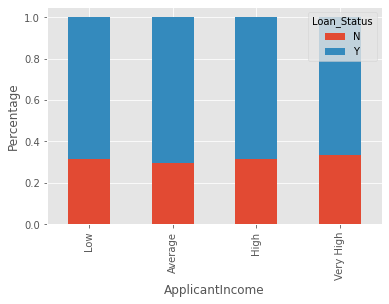

In [73]:
#Approved and unapproved loan request for applicant with mean income of 0, 2500, 4000, 6000, 81000
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
loan_data_train['Income_bin']=pd.cut(loan_data_train['ApplicantIncome'], bins, labels=group)
income_bin = pd.crosstab(loan_data_train['Income_bin'], loan_data_train['Loan_Status'])
income_bin.div(income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

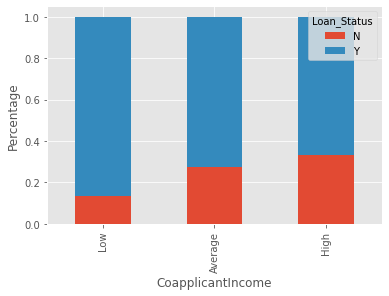

In [74]:
#Approved and unapproved loan request for coapplicant with mean income of 0, 1000, 3000, 42000
bins = [0, 1000, 3000, 42000]
group = ['Low', 'Average', 'High']
loan_data_train['Coapplicant_Income_bin'] = pd.cut(loan_data_train['CoapplicantIncome'], bins, labels=group)
coapplicant_income_bin = pd.crosstab(loan_data_train['Coapplicant_Income_bin'], loan_data_train['Loan_Status'])
coapplicant_income_bin.div(coapplicant_income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

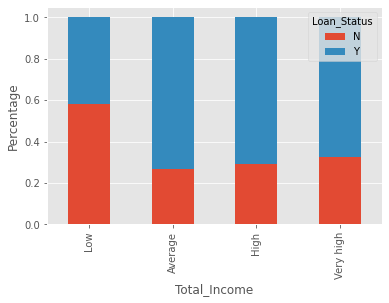

In [75]:
#Approved and unapproved loan request for the total income(sum applicant and coapplicant income) of 0, 2500, 4000, 6000, 81000
loan_data_train['Total_Income'] = loan_data_train['ApplicantIncome'] + loan_data_train['CoapplicantIncome']
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very high']
loan_data_train['Total_Income_bin'] = pd.cut(loan_data_train['Total_Income'], bins, labels=group)
total_income_bin = pd.crosstab(loan_data_train['Total_Income_bin'], loan_data_train['Loan_Status'])
total_income_bin.div(total_income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

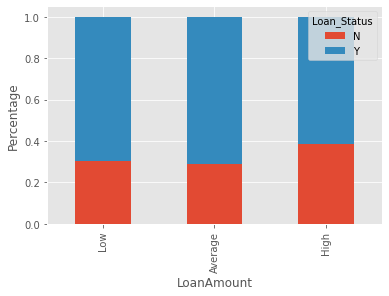

In [76]:
#Loan Amount Variable
bins = [0, 100, 200, 700]
group = ['Low', 'Average', 'High']
loan_data_train['LoanAmount_bin'] = pd.cut(loan_data_train['LoanAmount'], bins, labels=group)
loan_amount_bin = pd.crosstab(loan_data_train['LoanAmount_bin'], loan_data_train['Loan_Status'])
loan_amount_bin.div(loan_amount_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

In [77]:
#Transforming categorical variables into numbers and removing the bins created previously
loan_data_train = loan_data_train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
loan_data_train['Dependents'].replace('3+', 3, inplace=True)
loan_data_test['Dependents'].replace('3+', 3, inplace=True)
loan_data_train['Loan_Status'].replace('Y', 1, inplace=True)
loan_data_train['Loan_Status'].replace('N', 0, inplace=True)

<AxesSubplot:>

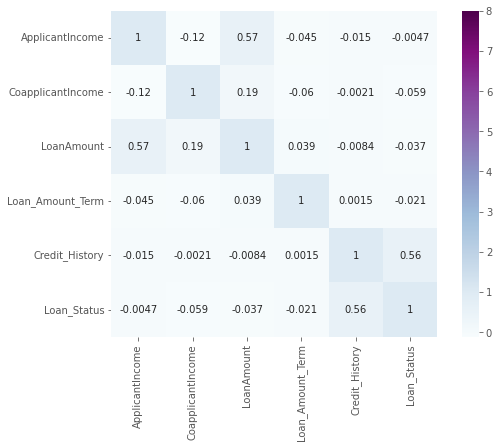

In [78]:
#Correlation
matrix = loan_data_train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=8,square=True,cmap="BuPu",annot=True)

In [79]:
#Checking missing values
loan_data_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [89]:
#Filling missing values

In [87]:
#Mode for categorical values
loan_data_train['Gender'].fillna(loan_data_train['Gender'].mode()[0], inplace=True)
loan_data_train['Dependents'].fillna(loan_data_train['Dependents'].mode()[0], inplace=True)
loan_data_train['Married'].fillna(loan_data_train['Married'].mode()[0], inplace=True)
loan_data_train['Self_Employed'].fillna(loan_data_train['Self_Employed'].mode()[0], inplace=True)
loan_data_train['Credit_History'].fillna(loan_data_train['Credit_History'].mode()[0], inplace=True)

In [88]:
#Median or mean for numerical values

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64